In [78]:
import os
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors
import seaborn as sns
import numpy as np
import rioxarray as rxr
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
from matplotlib.colors import ListedColormap, BoundaryNorm


In [88]:
custom_cmap = ListedColormap(['lavender', 'darkgreen', 'lightcyan', 'crimson'])
custom_cmap_for_colorbar = ListedColormap([ 'darkgreen', 'lightcyan', 'crimson','lavender'])


### Caution: If you are using this code the colors for map and color bar has been used different. Since 0 is coming first the colors of colorbar were changes to show 0 (others) in the last

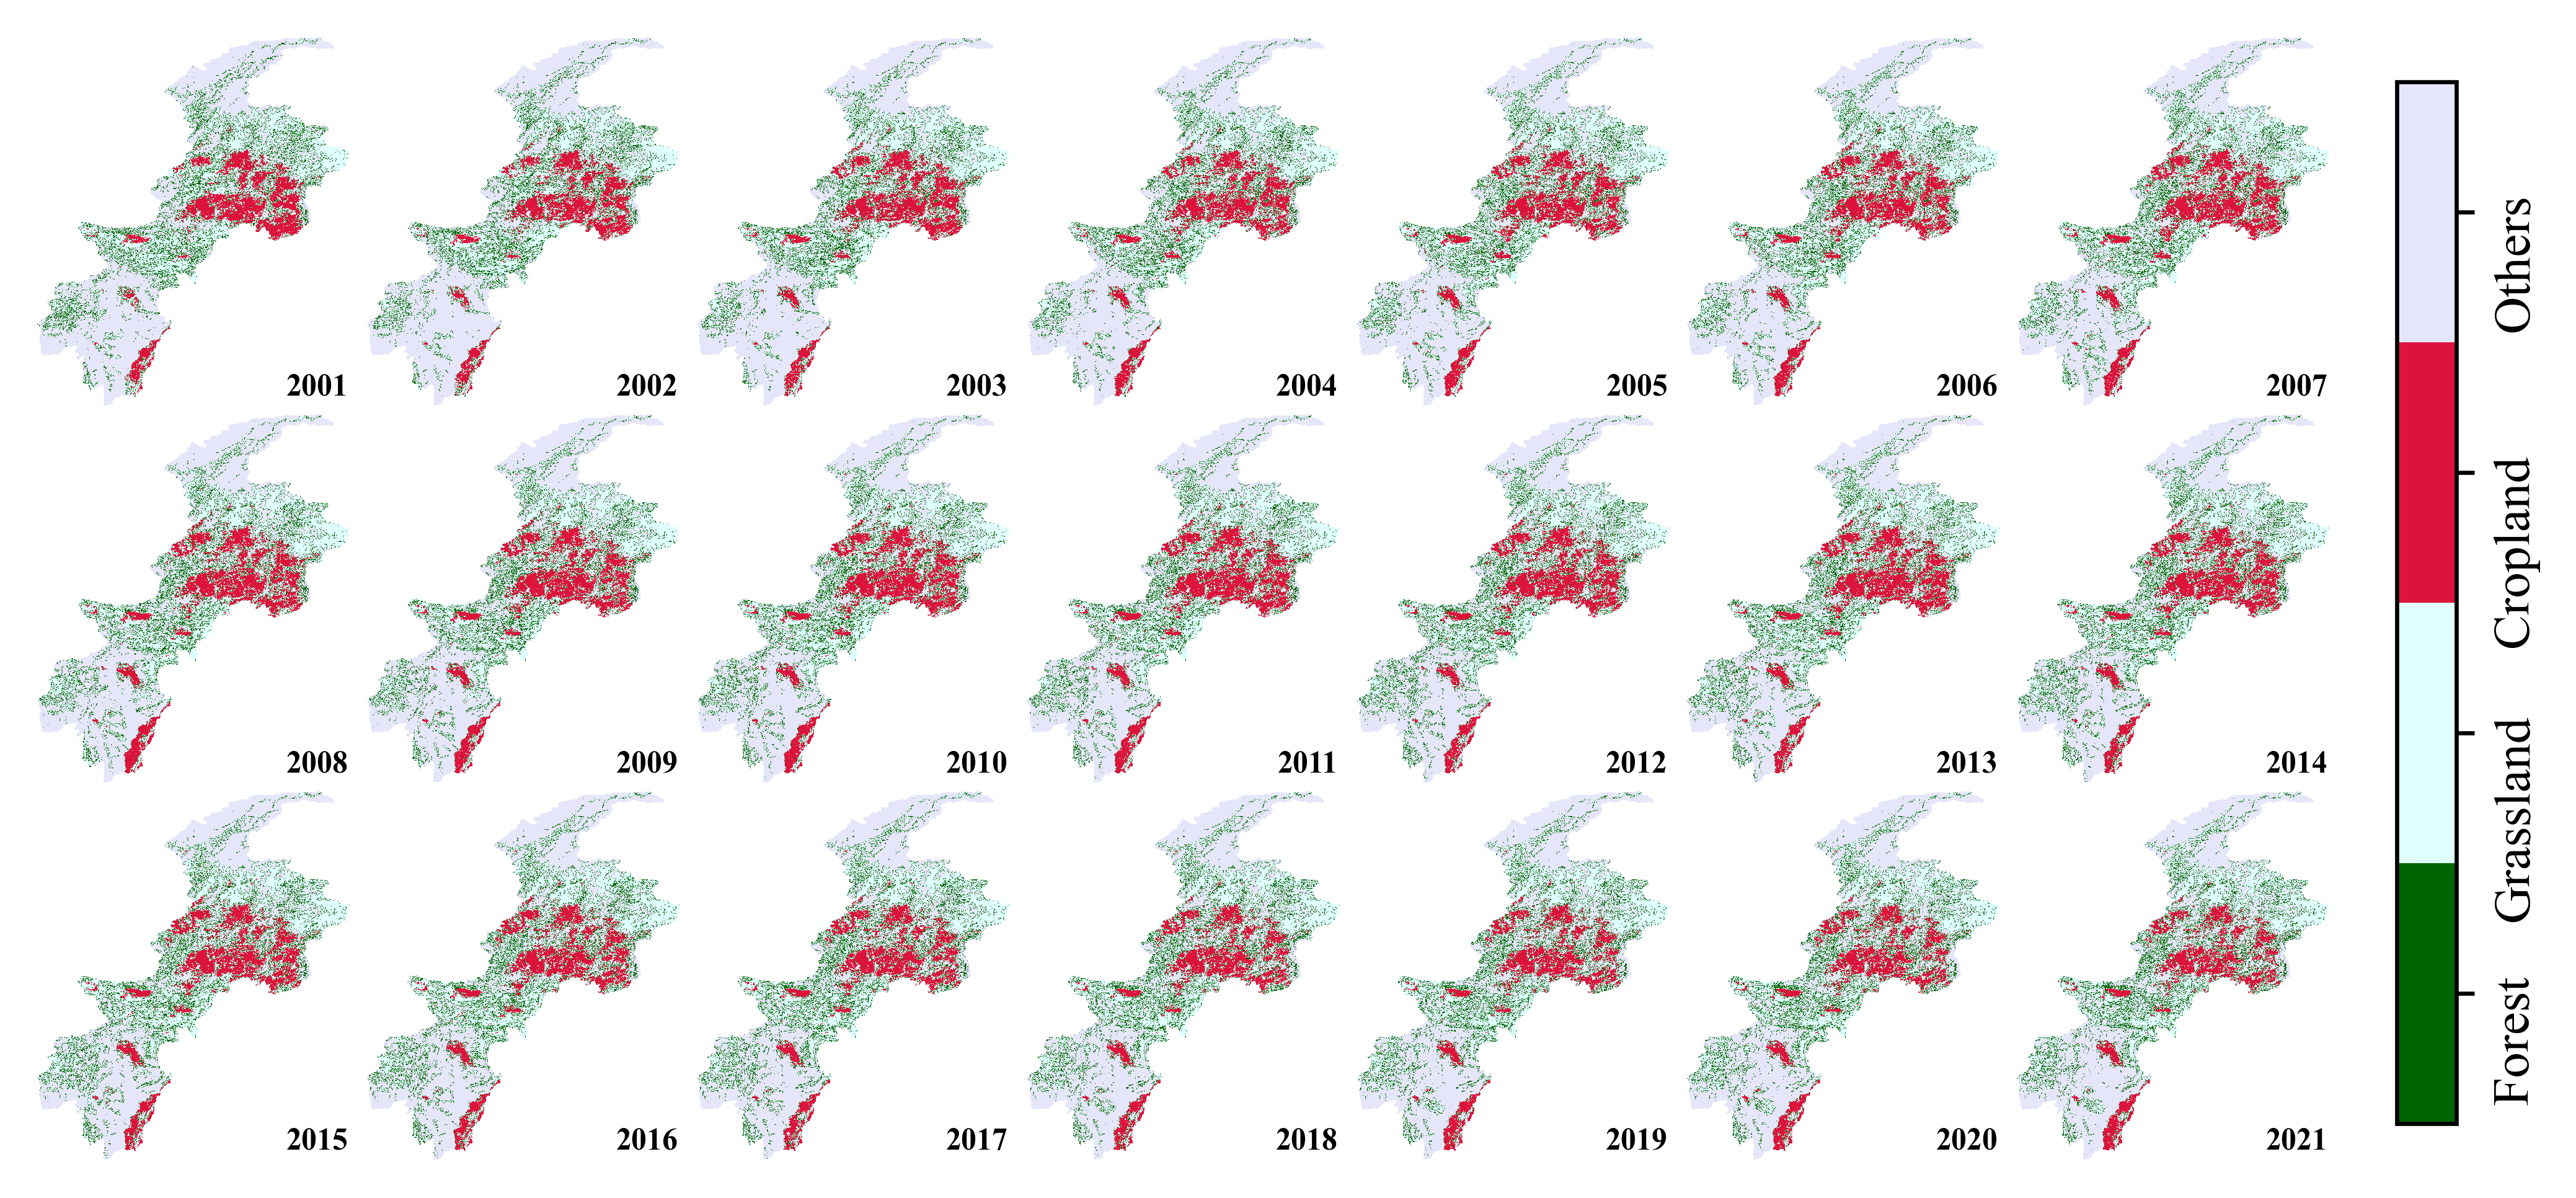

In [91]:
figname = "figure_maps"
input_folder = "version_2/output_2_clipped/"
files = [file for file in os.listdir(tiff_folder) if file.endswith('.tif')] 
fig, axs = plt.subplots(3, 7, figsize=(8, 4), dpi=600, sharex=True, sharey=True, frameon=False)
for ax in axs.flat:
    ax.axis('off')  # Turn off axis
    ax.set_frame_on(False)  # Turn off frame
locs = [(0,0), (0,1), (0,2), (0,3), (0,4), (0,5), (0,6), 
        (1,0), (1,1), (1,2),(1,3), (1,4), (1,5), (1,6), 
        (2,0), (2,1), (2,2),(2,3), (2,4), (2,5), (2,6), 
        #(3,0), (3,1), (3,2),
       #(4,0), (4,1), (4,2),
        #(5,0), (5,1), (5,2),
        #(6,0), (6,1), (6,2)
       ]
titles = ['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015',
          '2016','2017','2018','2019','2020','2021']
# Define discrete values for the colorbar
bounds = list(range(5))
norm = BoundaryNorm(bounds, custom_cmap_for_colorbar.N)
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Define colorbar axis position

for i, file in enumerate(files):
    image = os.path.join(input_folder, file)
    dataset = rasterio.open(image)
    show((dataset), ax=axs[locs[i]], cmap=custom_cmap)
    axs[locs[i]].xaxis.set_major_locator(ticker.NullLocator())
    axs[locs[i]].yaxis.set_major_locator(ticker.NullLocator())
    axs[locs[i]].axes.xaxis.set_visible(False)
    axs[locs[i]].axes.yaxis.set_visible(False)
    axs[locs[i]].text(0.99, 0.05, titles[i],
                      horizontalalignment='right', verticalalignment='center',
                      transform = axs[locs[i]].transAxes,
                     fontsize=6, weight='bold')
# Add colorbar
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=custom_cmap_for_colorbar, norm=norm), cax=cbar_ax)
cbar.set_ticks([0.5, 1.5, 2.5, 3.5])  # Set ticks at the middle of each bin
cbar.set_ticklabels([ 'Forest', 'Grassland', 'Cropland', 'Others'], rotation='vertical')
#cbar_ax.set_ylabel('Colorbar Label')  # Set colorbar label
plt.subplots_adjust(wspace=0.01, hspace=0.02)    
#plt.colorbar()
plt.show()
fig.savefig(figname, dpi=600, bbox_inches = "tight")

<AxesSubplot:>

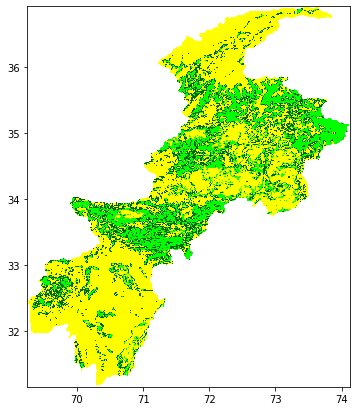

In [32]:
dataset = rasterio.open("version_2/output_2_clipped/mosaic_wgs84_2001_LC_Type1_reclassified.tif")
image = dataset.read()
fig, ax = plt.subplots(1, 3, figsize=(7, 7))
# Plot the raster with the custom colormap
show((dataset), ax=ax, cmap=custom_cmap)
#show((dataset), ax=axr, cmap=custom_cmap)

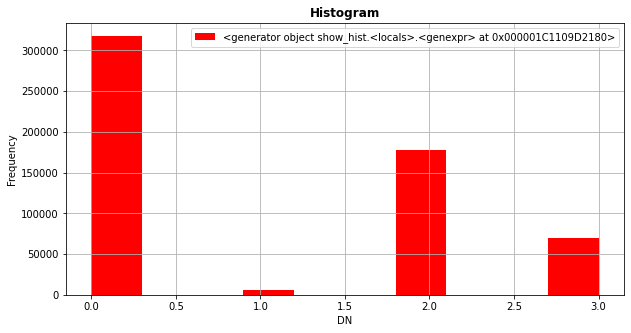

In [27]:
from rasterio.plot import show_hist

fig, ax = plt.subplots(figsize=(10,5))
show_hist(dataset, ax=ax)

In [18]:


# Define the folder path containing the raster TIF files
folder_path = "version_2/output_2_clipped"
print(os.listdir(folder_path))
# Find all TIF files in the folder
tif_files = glob.glob(folder_path + "*.tif")
# Check if there are any TIF files found
if not tif_files:
    print("No TIF files found in the specified folder.")
else:
    # Create a figure and axes
    num_files = len(tif_files)
    num_cols = 7  # Number of columns in the grid
    num_rows = -(-num_files // num_cols)  # Ceiling division to get number of rows
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 10))

    # Iterate over each raster TIF file
    for i, tif_file in enumerate(tif_files):
        # Calculate row and column indices
        row_idx = i // num_cols
        col_idx = i % num_cols

        # Open the raster TIF file
        with rasterio.open(tif_file) as src:
            # Plot the raster
            ax = axs[row_idx, col_idx]
            show(src, ax=ax, title=tif_file)

    # Remove empty subplots
    for i in range(len(tif_files), num_rows * num_cols):
        ax = axs.flatten()[i]
        ax.axis('off')

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

['mosaic_wgs84_2001_LC_Type1_reclassified.tif', 'mosaic_wgs84_2001_LC_Type1_reclassified.tif.aux.xml', 'mosaic_wgs84_2001_LC_Type1_reclassified.tif.vat.cpg', 'mosaic_wgs84_2001_LC_Type1_reclassified.tif.vat.dbf', 'mosaic_wgs84_2002_LC_Type1_reclassified.tif', 'mosaic_wgs84_2003_LC_Type1_reclassified.tif', 'mosaic_wgs84_2004_LC_Type1_reclassified.tif', 'mosaic_wgs84_2005_LC_Type1_reclassified.tif', 'mosaic_wgs84_2006_LC_Type1_reclassified.tif', 'mosaic_wgs84_2007_LC_Type1_reclassified.tif', 'mosaic_wgs84_2008_LC_Type1_reclassified.tif', 'mosaic_wgs84_2009_LC_Type1_reclassified.tif', 'mosaic_wgs84_2010_LC_Type1_reclassified.tif', 'mosaic_wgs84_2011_LC_Type1_reclassified.tif', 'mosaic_wgs84_2012_LC_Type1_reclassified.tif', 'mosaic_wgs84_2013_LC_Type1_reclassified.tif', 'mosaic_wgs84_2014_LC_Type1_reclassified.tif', 'mosaic_wgs84_2015_LC_Type1_reclassified.tif', 'mosaic_wgs84_2016_LC_Type1_reclassified.tif', 'mosaic_wgs84_2017_LC_Type1_reclassified.tif', 'mosaic_wgs84_2018_LC_Type1_reclass